Submitted By: Soham Suryawanshi

## About Walmart:

Walmart, a global retail giant headquartered in Bentonville, Arkansas, is one of the world's largest and most well-known retail corporations. Founded in 1962 by Sam Walton, Walmart has since grown into a multinational company with a significant impact on the retail industry and economies worldwide.

Walmart operates a wide range of retail formats, including hypermarkets, supermarkets, warehouse clubs, and e-commerce platforms. The company's stores offer a diverse selection of products, including groceries, clothing, electronics, home goods, and more. Its e-commerce presence has expanded in recent years, allowing customers to shop online and have items delivered to their doorsteps.

## Business Problem:

The Management of Walmart Inc. aims to assess customer purchase behavior, particularly the purchase amount, concerning customer gender and other relevant factors. This analysis aims to provide insights into potential variations in spending habits between male and female customers during Black Friday. The goal is to determine whether women's spending on Black Friday surpasses that of men, with an assumption of 50 million male customers and 50 million female customers.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,geom,poisson,expon

In [8]:
df = pd.read_csv("Walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


As we can see there are total 55068 rows and 10 columns in our data

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

So in this dataset there are no null values.

In [60]:
df[df.duplicated()==True]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


As we can see, our data don't have any duplicates

In [26]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [27]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

So in our dataset there are overall 4225 unique Male customers and unique 1666 Female customers

Let's convert Marital status into married and unmarried based for easy of understanding

In [28]:
def convert(x):
    if x==1:
        return "Married"
    else:
        return "Unmarried"
df["Marital_Status"] = df["Marital_Status"].transform(convert)

In [31]:
df.groupby("Marital_Status")["User_ID"].nunique()

Marital_Status
Married      2474
Unmarried    3417
Name: User_ID, dtype: int64

So there are total 2474 unique married customers and 3417 unique unmarried customers

In [32]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


In [40]:
unique_df = df.groupby("User_ID")["Product_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category","Purchase"].max()
unique_df

C:\Users\Interviewbit\AppData\Local\Temp\ipykernel_3184\1335194066.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unique_df = df.groupby("User_ID")["Product_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category","Purchase"].max()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,,,,,,,,,
1000001,P0097142,F,0-17,10,A,2,Unmarried,20,19219
1000002,P00372445,M,55+,16,C,4+,Unmarried,20,20657
1000003,P0098342,M,26-35,15,A,3,Unmarried,18,19631
1000004,P0097242,M,46-50,7,B,2,Married,20,19693
1000005,P00355142,M,26-35,20,A,1,Married,16,21021
...,...,...,...,...,...,...,...,...,...
1006036,P0098942,F,26-35,15,B,4+,Married,20,23525
1006037,P0095542,F,46-50,1,C,4+,Unmarried,18,23714
1006038,P00375436,F,55+,1,C,2,Unmarried,20,13565


In [41]:
unique_df["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [42]:
unique_df["Age"].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

From above we can say maximum customers are from people having age group 26-35

In [43]:
unique_df["Occupation"].value_counts()

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64

Maximum customers were from occupation category of "4"

In [44]:
unique_df["City_Category"].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

Maximum customers were from City Category "C"

In [46]:
unique_df["Stay_In_Current_City_Years"].value_counts()

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

Maximum customers were those who stayed in the current city for 1 year 

In [47]:
unique_df["Marital_Status"].value_counts()

Unmarried    3417
Married      2474
Name: Marital_Status, dtype: int64

In [48]:
unique_df["Product_Category"].value_counts()

20    2550
19    1603
16     595
18     397
15     186
8      155
11     116
13      72
12      55
17      48
14      46
5       30
10      23
6        9
1        3
2        1
9        1
7        1
Name: Product_Category, dtype: int64

Maximum product category purchased was "20"

# Analysis of data:

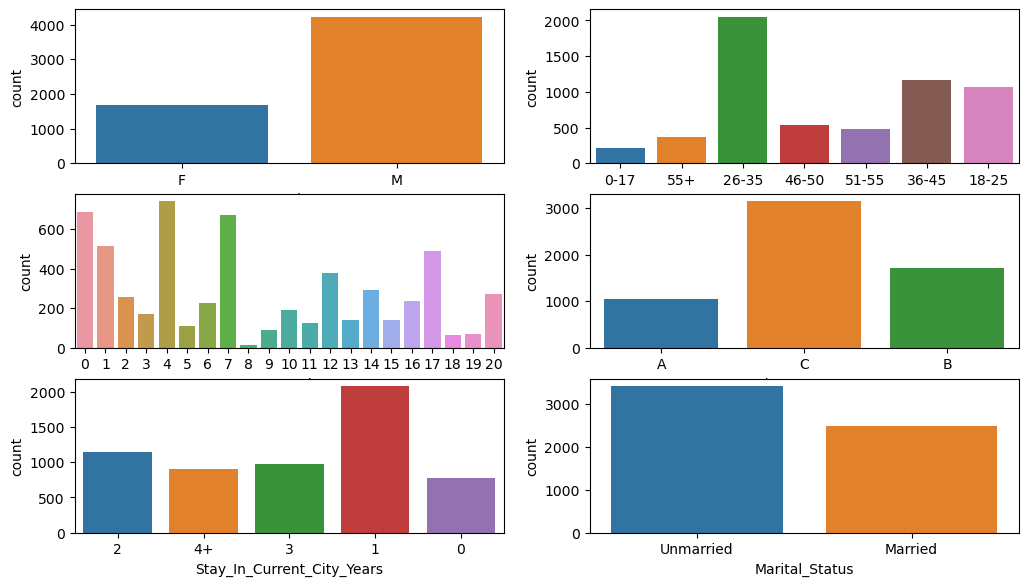

In [51]:
fig, axis =plt.subplots(nrows=3 ,ncols=2)
fig.subplots_adjust(right=1.6,top=1.2)

sns.countplot(data=unique_df,x='Gender',ax=axis[0,0])
sns.countplot(data=unique_df,x='Age',ax=axis[0,1])
sns.countplot(data=unique_df,x='Occupation',ax=axis[1,0])
sns.countplot(data=unique_df,x='City_Category',ax=axis[1,1])
sns.countplot(data=unique_df,x='Stay_In_Current_City_Years',ax=axis[2,0])
sns.countplot(data=unique_df,x='Marital_Status',ax=axis[2,1])
plt.show()

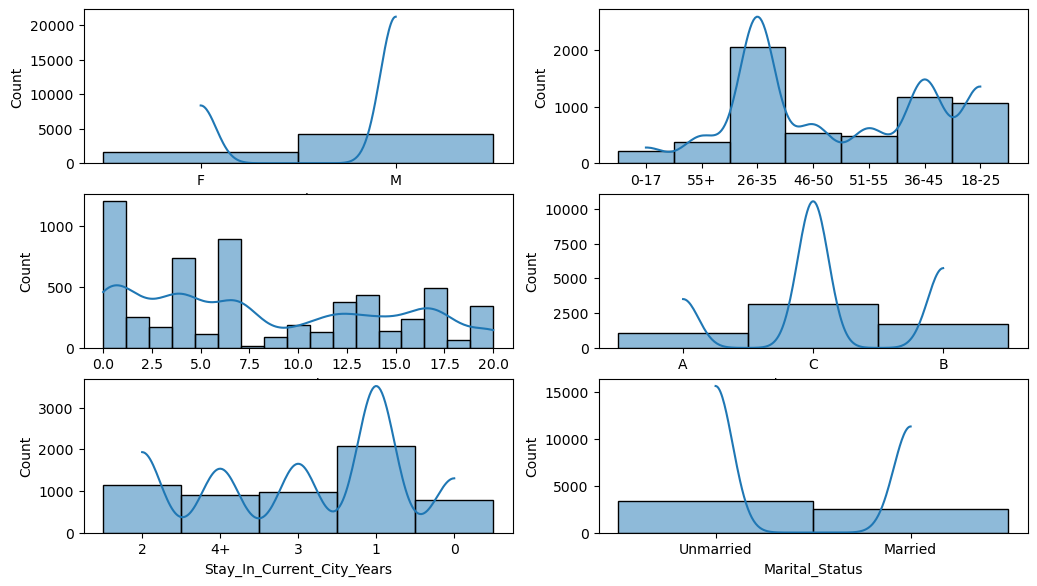

In [56]:
fig, axis =plt.subplots(nrows=3 ,ncols=2)
fig.subplots_adjust(right=1.6,top=1.2)

sns.histplot(data=unique_df,x='Gender',kde=True,ax=axis[0,0])
sns.histplot(data=unique_df,x='Age',kde=True,ax=axis[0,1])
sns.histplot(data=unique_df,x='Occupation',kde=True,ax=axis[1,0])
sns.histplot(data=unique_df,x='City_Category',kde=True,ax=axis[1,1])
sns.histplot(data=unique_df,x='Stay_In_Current_City_Years',kde=True,ax=axis[2,0])
sns.histplot(data=unique_df,x='Marital_Status',kde=True,ax=axis[2,1])
plt.show()

# Outliers in the Dataset:

Let's do outliers analysis on the married and unmarried purchasers

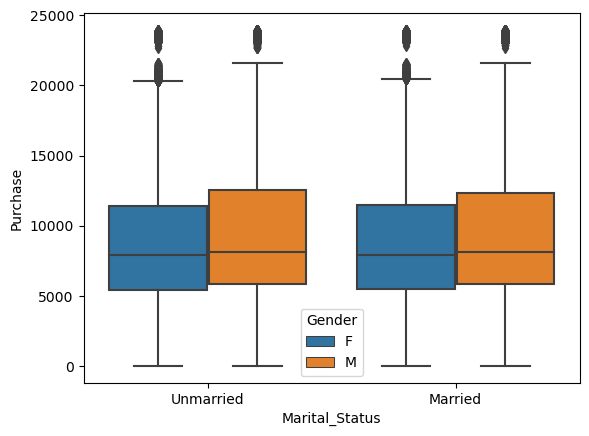

In [61]:
sns.boxplot(data = df,x = "Marital_Status",y = "Purchase", hue = "Gender")
plt.show()

In [64]:
iqr = df["Purchase"].quantile(0.75) - df["Purchase"].quantile(0.25)
iqr



6231.0

In [66]:
upper_whisker_max = df["Purchase"].quantile(0.75)+1.5*iqr
upper_whisker_max

21400.5

Let's find out married and unmarried buyer's beyond upper_whisker_max which are the potential outliers


In [70]:
df1=df[(df["Purchase"]>upper_whisker_max) & (df["Marital_Status"]=="Married")]
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3166,1000523,P00117642,M,51-55,7,A,1,Married,10,23159
3167,1000523,P00200642,M,51-55,7,A,1,Married,10,23741
4148,1000679,P00052842,M,36-45,16,C,4+,Married,10,23384
5907,1000957,P00085342,M,36-45,1,C,2,Married,10,23650
5953,1000968,P00159542,M,51-55,12,A,4+,Married,10,23126
...,...,...,...,...,...,...,...,...,...,...
543514,1005680,P00085342,M,51-55,20,A,4+,Married,10,23682
543515,1005680,P00087042,M,51-55,20,A,4+,Married,10,23273
543823,1005736,P00052842,M,26-35,1,A,3,Married,10,23642
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529


So there are 1188 purchases made by married people who are potential outliers

In [72]:
df1["User_ID"].nunique()

664

So there are 664 married users who made those purchases and are potential outliers

Similarly we can find this out for unmarried users

In [75]:
df2=df[(df["Purchase"]>upper_whisker_max) & (df["Marital_Status"]=="Unmarried")]
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Unmarried,10,23341
...,...,...,...,...,...,...,...,...,...,...
544015,1005759,P00200642,F,26-35,1,A,2,Unmarried,10,23680
544417,1005811,P00117642,M,18-25,4,B,3,Unmarried,10,23284
544488,1005815,P00116142,M,26-35,20,B,1,Unmarried,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Unmarried,10,23724


So there are 1489 purchases made by unmarried people who are potential outliers

In [77]:
df2["User_ID"].nunique()

823

So there are 823 unmarried users who made those purchases and are potential outliers

### Average amount spent by Male Customer per transaction

In [81]:
df_male = df[df["Gender"]=="M"]
df_male["Purchase"].mean()

9437.526040472265

### Average amount spent by Female Customer per transaction

In [82]:
df_female = df[df["Gender"]=="F"]
df_female["Purchase"].mean()

8734.565765155476

### Average amount spent by each customer per transaction

In [83]:
df["Purchase"].mean()

9263.968712959126

So we can say that Male Customer spends money above the average spending and more then female customer

# Confidence Interval Calculation:

### Gender Analysis:

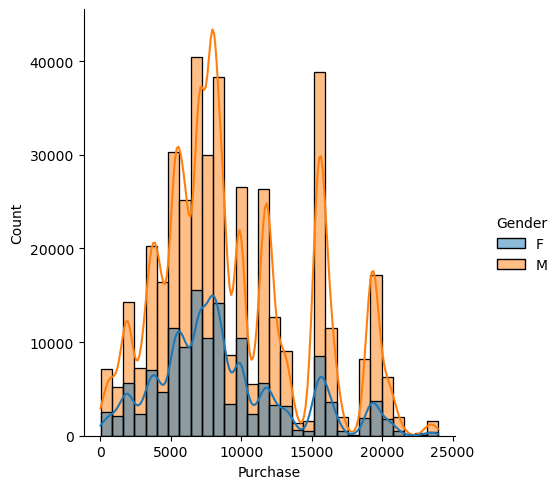

In [86]:
sns.displot(data = df, x = "Purchase", hue = "Gender",bins=30, kde=True)


### 99%, 95%, 90% Confidence Intervals for Male and Female:

In [109]:
for gender in df['Gender'].unique():
    if gender=="M":
        print('For Male:')
        mean_M=[]

        for i in range(1000):
            mean_M.append(df[df['Gender']==gender].sample(500)['Purchase'].mean())

        print('99% of the population expense lies between (', np.mean(mean_M)+norm.ppf(0.005)*np.std(mean_M),',',np.mean(mean_M)+norm.ppf(0.995)*np.std(mean_M),')')
        print('95% of the population expense lies between (', np.mean(mean_M)+norm.ppf(0.025)*np.std(mean_M),',',np.mean(mean_M)+norm.ppf(0.975)*np.std(mean_M),')')
        print('90% of the population expense lies between (', np.mean(mean_M)+norm.ppf(0.05)*np.std(mean_M),',',np.mean(mean_M)+norm.ppf(0.95)*np.std(mean_M),')')
        print()
        
    else:
        print("For Female:")
        mean_F=[]
        
        for i in range(1000):
            mean_F.append(df[df['Gender']==gender].sample(500)['Purchase'].mean())

        print('99% of the population expense lies between (', np.mean(mean_F)+norm.ppf(0.005)*np.std(mean_F),',',np.mean(mean_F)+norm.ppf(0.995)*np.std(mean_F),')')
        print('95% of the population expense lies between (', np.mean(mean_F)+norm.ppf(0.025)*np.std(mean_F),',',np.mean(mean_F)+norm.ppf(0.975)*np.std(mean_F),')')
        print('90% of the population expense lies between (', np.mean(mean_F)+norm.ppf(0.05)*np.std(mean_F),',',np.mean(mean_F)+norm.ppf(0.95)*np.std(mean_F),')')
        print()

For Female:
99% of the population expense lies between ( 8194.112011490924 , 9267.684528509075 )
95% of the population expense lies between ( 8322.45438257925 , 9139.34215742075 )
90% of the population expense lies between ( 8388.12135423548 , 9073.67518576452 )

For Male:
99% of the population expense lies between ( 8858.845323008756 , 10020.938384991243 )
95% of the population expense lies between ( 8997.770059471253 , 9882.013648528746 )
90% of the population expense lies between ( 9068.851547636634 , 9810.932160363365 )



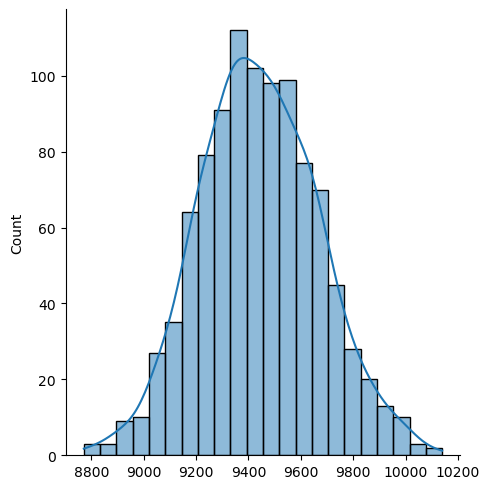

In [110]:
sns.displot(mean_M,kde=True)

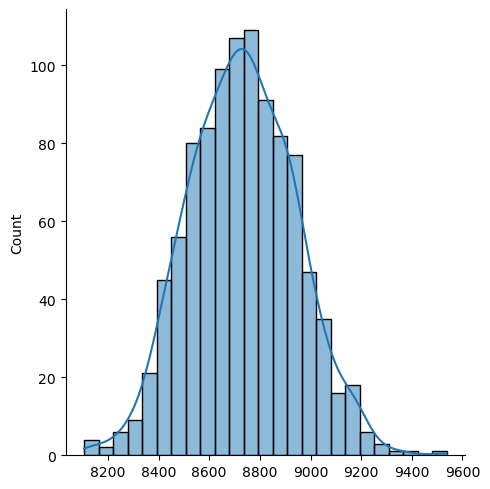

In [111]:
sns.displot(mean_F,kde=True)

From above both the distributions follows Normal Distribution

### For Married and Unmarried Customers:

In [119]:
for status in df["Marital_Status"].unique():
    if status=="Married":
        print('For Married:')
        mean_married=[]

        for i in range(1000):
            mean_married.append(df[df['Marital_Status']==status].sample(500)['Purchase'].mean())

        print('99% of the population expense lies between (', np.mean(mean_married)+norm.ppf(0.005)*np.std(mean_married),',',np.mean(mean_married)+norm.ppf(0.995)*np.std(mean_married),')')
        print('95% of the population expense lies between (', np.mean(mean_married)+norm.ppf(0.025)*np.std(mean_married),',',np.mean(mean_married)+norm.ppf(0.975)*np.std(mean_married),')')
        print('90% of the population expense lies between (', np.mean(mean_married)+norm.ppf(0.05)*np.std(mean_married),',',np.mean(mean_married)+norm.ppf(0.95)*np.std(mean_married),')')
        print()
        
    else:
        print("For Unmarried:")
        mean_unmarried=[]
        
        for i in range(1000):
            mean_unmarried.append(df[df['Marital_Status']==status].sample(500)['Purchase'].mean())

        print('99% of the population expense lies between (', np.mean(mean_unmarried)+norm.ppf(0.005)*np.std(mean_unmarried),',',np.mean(mean_unmarried)+norm.ppf(0.995)*np.std(mean_unmarried),')')
        print('95% of the population expense lies between (', np.mean(mean_unmarried)+norm.ppf(0.025)*np.std(mean_unmarried),',',np.mean(mean_unmarried)+norm.ppf(0.975)*np.std(mean_unmarried),')')
        print('90% of the population expense lies between (', np.mean(mean_unmarried)+norm.ppf(0.05)*np.std(mean_unmarried),',',np.mean(mean_unmarried)+norm.ppf(0.95)*np.std(mean_unmarried),')')
        print()

For Unmarried:
99% of the population expense lies between ( 8669.577919882697 , 9851.476136117304 )
95% of the population expense lies between ( 8810.87030307254 , 9710.183752927462 )
90% of the population expense lies between ( 8883.163208708382 , 9637.89084729162 )

For Married:
99% of the population expense lies between ( 8695.94972420927 , 9821.28096379073 )
95% of the population expense lies between ( 8830.479695178345 , 9686.750992821655 )
90% of the population expense lies between ( 8899.312581119497 , 9617.918106880503 )



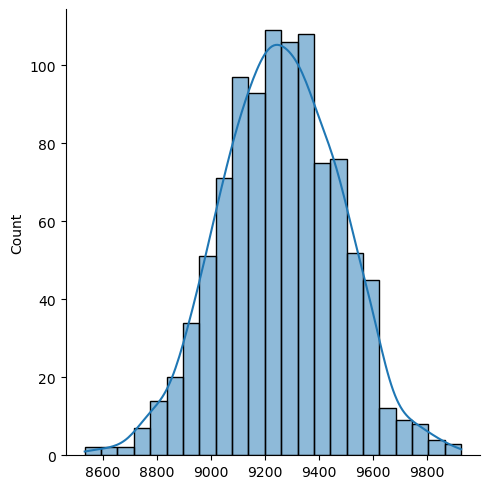

In [120]:
sns.displot(mean_married,kde=True)

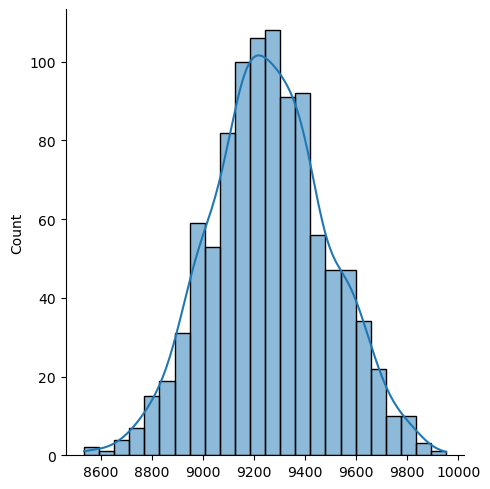

In [121]:
sns.displot(mean_unmarried,kde=True)

Married and Unmarried also follows Normal DIstribution for purchases made

### Age Groupwise:

For Age Group 0-17 :
99% of the population expense lies between ( 8214.686083368673 , 9676.125836631323 )
95% of the population expense lies between ( 8389.396818007659 , 9501.415101992337 )
90% of the population expense lies between ( 8478.788378739242 , 9412.023541260754 )


<Figure size 500x500 with 0 Axes>

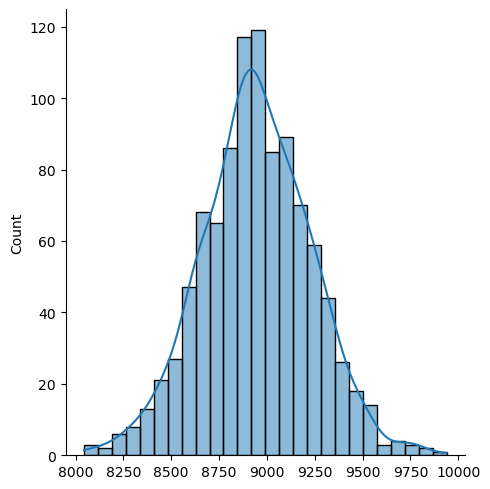


For Age Group 18-25 :
99% of the population expense lies between ( 8412.3257374173 , 9915.334202582697 )
95% of the population expense lies between ( 8592.005886757312 , 9735.654053242686 )
90% of the population expense lies between ( 8683.940071655434 , 9643.719868344564 )


<Figure size 500x500 with 0 Axes>

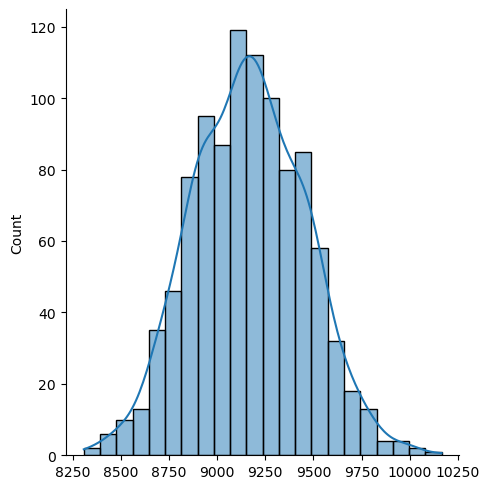


For Age Group 26-35 :
99% of the population expense lies between ( 8495.87798167537 , 9998.497364991297 )
95% of the population expense lies between ( 8675.511617448465 , 9818.863729218201 )
90% of the population expense lies between ( 8767.422003463536 , 9726.953343203131 )


<Figure size 500x500 with 0 Axes>

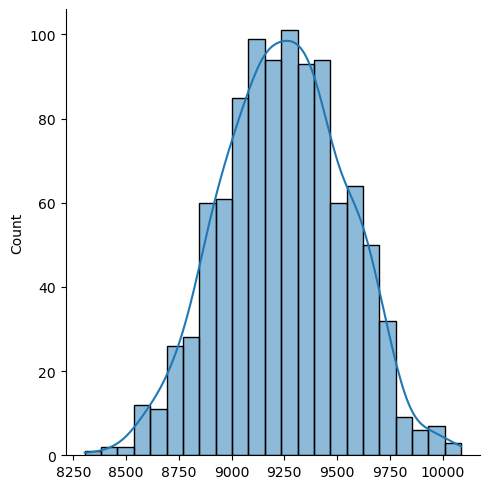


For Age Group 36-45 :
99% of the population expense lies between ( 8606.472276356948 , 10070.491776976382 )
95% of the population expense lies between ( 8781.491412046938 , 9895.472641286391 )
90% of the population expense lies between ( 8871.040767612007 , 9805.923285721323 )


<Figure size 500x500 with 0 Axes>

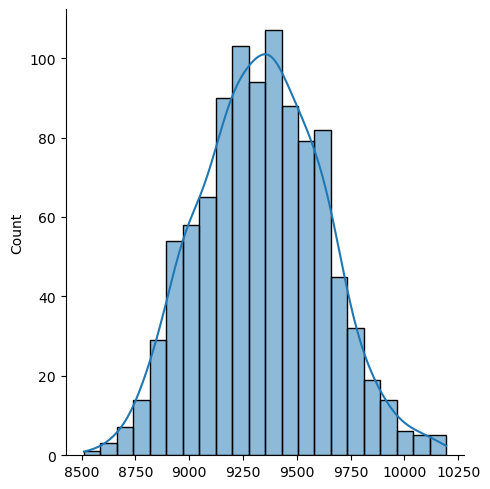


For Age Group 46-50 :
99% of the population expense lies between ( 8476.232326887046 , 9921.695579779622 )
95% of the population expense lies between ( 8649.033118875037 , 9748.89478779163 )
90% of the population expense lies between ( 8737.447448557634 , 9660.480458109034 )


<Figure size 500x500 with 0 Axes>

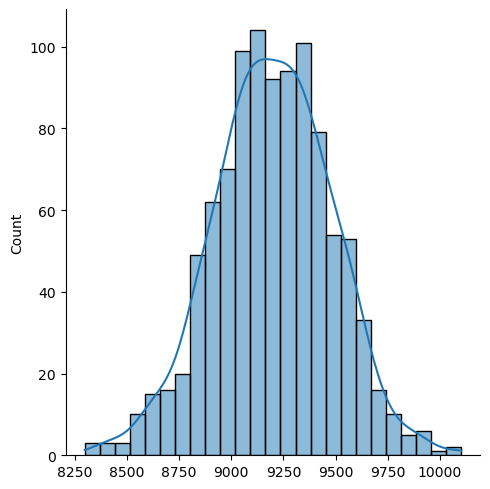


For Age Group 51-55 :
99% of the population expense lies between ( 8776.686882057274 , 10284.605524609393 )
95% of the population expense lies between ( 8956.954028361428 , 10104.33837830524 )
90% of the population expense lies between ( 9049.188552988977 , 10012.10385367769 )


<Figure size 500x500 with 0 Axes>

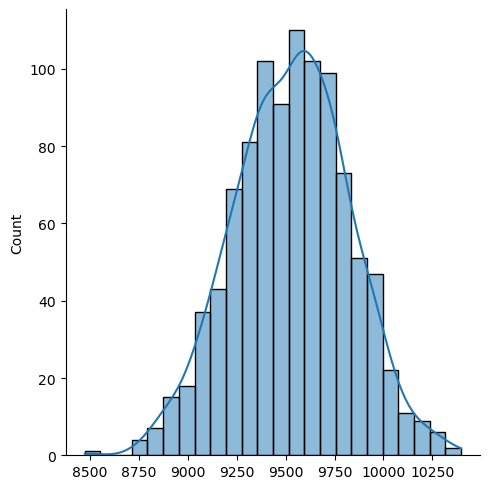


For Age Group 55+ :
99% of the population expense lies between ( 8623.848016389464 , 10072.020123610539 )
95% of the population expense lies between ( 8796.972643779294 , 9898.895496220708 )
90% of the population expense lies between ( 8885.552665352836 , 9810.315474647166 )


<Figure size 500x500 with 0 Axes>

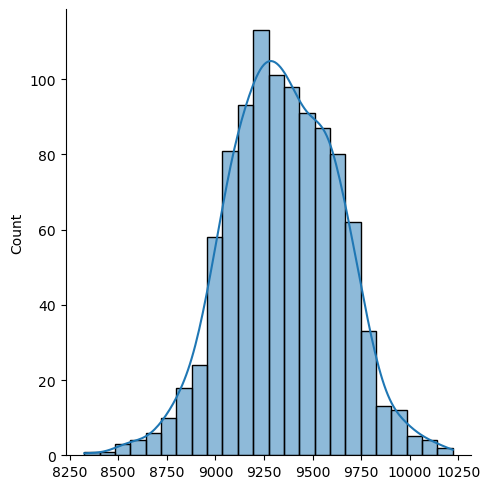

In [126]:
for age in df['Age'].sort_values().unique():
    print('For Age Group',age,':')
    mean_age=[]
    for i in range(1000):
        mean_age.append(df[df['Age']==age].sample(300)['Purchase'].mean())
    
    print('99% of the population expense lies between (', np.mean(mean_age)+norm.ppf(0.005)*np.std(mean_age),',',np.mean(mean_age)+norm.ppf(0.995)*np.std(mean_age),')')
    print('95% of the population expense lies between (', np.mean(mean_age)+norm.ppf(0.025)*np.std(mean_age),',',np.mean(mean_age)+norm.ppf(0.975)*np.std(mean_age),')')
    print('90% of the population expense lies between (', np.mean(mean_age)+norm.ppf(0.05)*np.std(mean_age),',',np.mean(mean_age)+norm.ppf(0.95)*np.std(mean_age),')')
    plt.figure(figsize=(5,5))
    sns.displot(mean_age,kde=True)
    plt.show()
    print()   

All age groups also follow Normal Distribution for their purchases.

### Insights:

1)There is a higher presence of male customers during Black Friday, and males tend to allocate more funds for their purchases.

2)Approximately 35% of the total expenditure on Black Friday is attributed to the age group of 26-35.

3)The largest number of customers originated from City Category C.

4)The majority of customers have resided in their current city for 1-2 years.

5)Unmarried customers are more than married customers.


6)The mean expenditure by individual males is 925,344.40, while for females, it stands at 712,024.39.

7)The average expenditure per transaction is 9,437.52 for males and 8,734.56 for females.

### Conclusion and Recommendations:

1)Offering increased discounts and launching ad campaigns targeting female customers could attract more of them to Walmart, leading to higher spending in-store.

2)Introducing online shopping facilities would benefit the age group of 41 years and above, enabling them to make purchases conveniently from their homes.

3)To cater to the demand in City Category C, expanding the number of stores is recommended, as this category draws a substantial customer base, necessitating adequate stock levels.

4)To encourage married individuals to make purchases, strategies should be devised that align with their preferences, considering that single customers currently exhibit higher spending tendencies.